***
<pre>                                                 <i> Linear Regression <i></pre>
***
</div>
    <img src="INSEA_logo.png"  style="height: 80px;: 20px;">
</div>

<div style="background-color: green">
<h1 align="center"> Multiple Linear Regression  </h1>
</div>

<pre align='left'>  18/04/2025                                                                                         <i> Author: DAOUDI Adam </i></pre>


____________________________________________________________________________________________________________________________________________________________

#### objectifs :
- Read the Data

- Exploratory Data Analysis

- Encoding of the Categorical Variables

- Regression with statsmodel

- sklearn Regression Pipelines

### Importing Libreries

In [646]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from feature_engine.encoding import OrdinalEncoder, MeanEncoder
from feature_engine.encoding import OneHotEncoder

from scipy.stats import kurtosis, skew, probplot
import statsmodels.api as sm

### Load Datset

In [647]:
StudentsPerformance = pd.read_csv("StudentsPerformance[1].csv")

StudentsPerformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Data Vis

In [648]:
print(f'-StudentsPerformance shape is {StudentsPerformance.shape}\n')
print(f'- The data set columns are {StudentsPerformance.dtypes}\n')
print(f'- The datasest has {StudentsPerformance.isnull().sum().max()} null values \n')
print(f'- The datset has {StudentsPerformance.duplicated().sum()} duplicated rows\n')

-StudentsPerformance shape is (1000, 8)

- The data set columns are gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

- The datasest has 0 null values 

- The datset has 0 duplicated rows



In [649]:
StudentsPerformance.dtypes


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [650]:
StudentsPerformance.describe

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none  

## Data Analysis

### categorical Variables

In [651]:
cat_cols = [cols for cols in StudentsPerformance.columns if StudentsPerformance[cols].dtype == 'object']
print(f'Categorical columns in the dataframe are: {cat_cols}', end='')
print('\n')
num_cols = [cols for cols in StudentsPerformance.columns if StudentsPerformance[cols].dtype != 'object']
print(f'numerical columns in the dataframe are: {num_cols}', end='')


Categorical columns in the dataframe are: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

numerical columns in the dataframe are: ['math score', 'reading score', 'writing score']

Text(0.5, 1.0, 'Parental level of education VS Ethnicity')

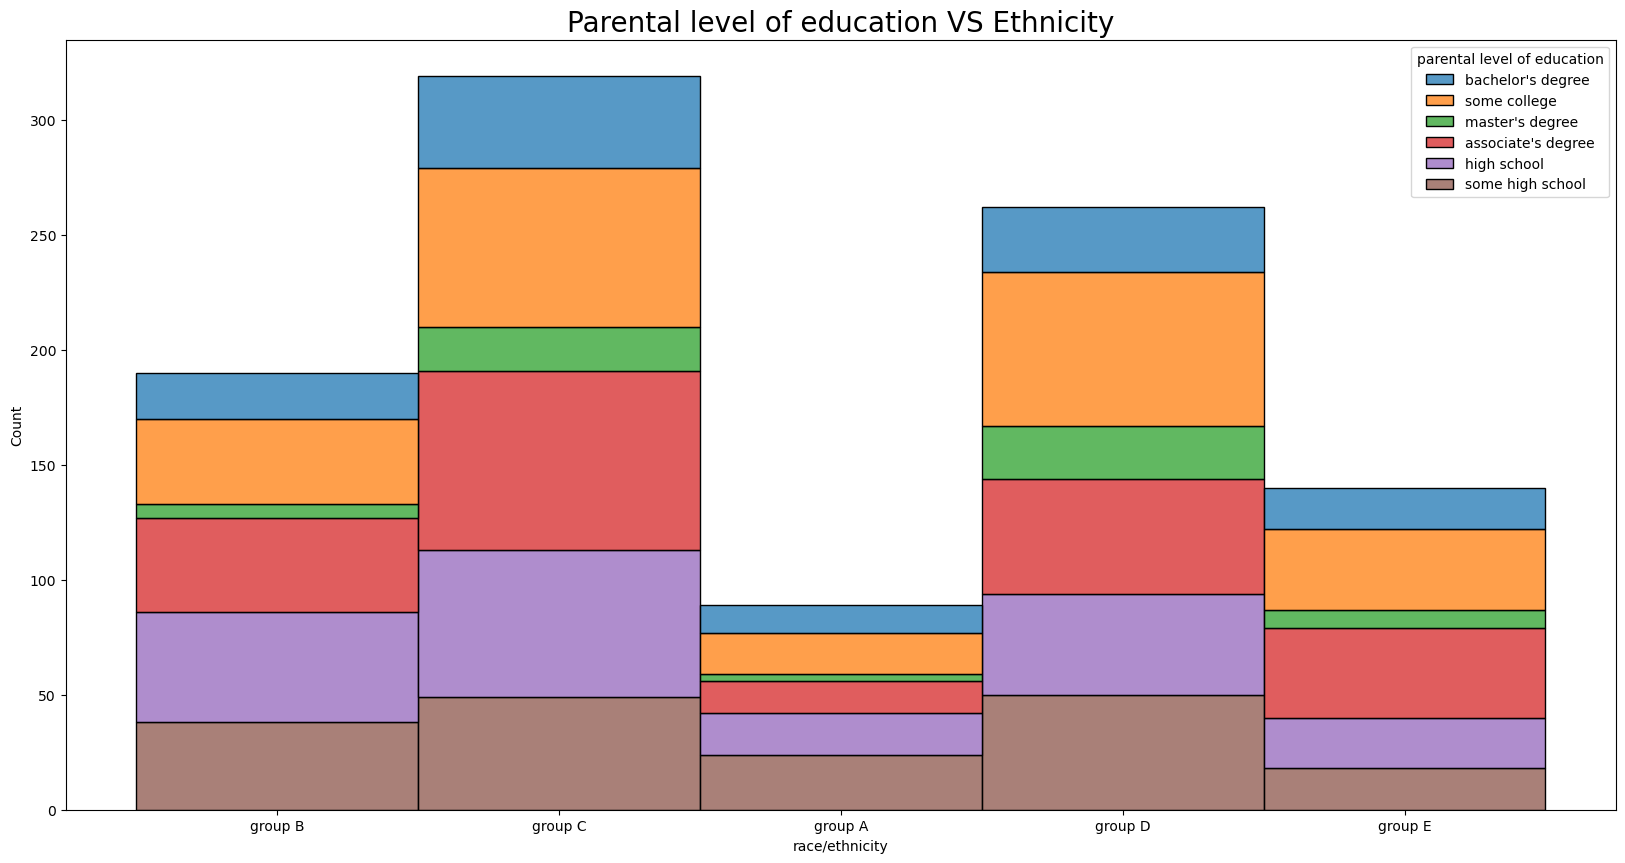

In [652]:
plt.figure(figsize=(20, 10))
sns.histplot(data=StudentsPerformance, x='race/ethnicity', hue='parental level of education', multiple='stack')
plt.title('Parental level of education VS Ethnicity', size=20)

### Numerical Values

In [653]:
num_cols

['math score', 'reading score', 'writing score']

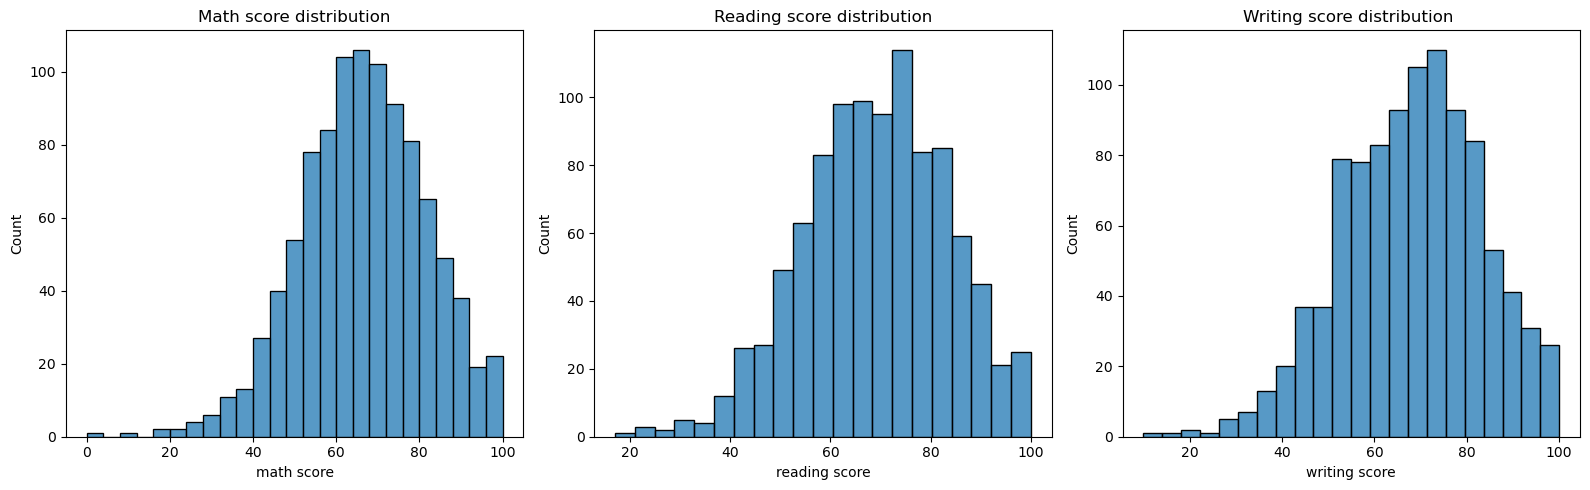

In [654]:
fig , (ax1, ax2, ax3)= plt.subplots(ncols=3, figsize=(16,5))

ax1=sns.histplot(data=StudentsPerformance, x='math score', ax=ax1)
ax1.set_title('Math score distribution', size=12)

ax2=sns.histplot(data=StudentsPerformance, x='reading score', ax=ax2)
ax2.set_title('Reading score distribution', size=12)

ax3= sns.histplot(data=StudentsPerformance, x='writing score', ax=ax3)
ax3.set_title('Writing score distribution ', size=12)


plt.tight_layout()

In [655]:
for col in num_cols:
    print(f'---------------------{col}-------------------------')
    print(f'Skewness of {col}:{StudentsPerformance[col].skew()} ')
    print(f'Kurtosis of {col}: {StudentsPerformance[col].kurtosis()}\n')
    print('\n')

---------------------math score-------------------------
Skewness of math score:-0.27893514909431694 
Kurtosis of math score: 0.27496405752108455



---------------------reading score-------------------------
Skewness of reading score:-0.25910451810923063 
Kurtosis of reading score: -0.0682654585647704



---------------------writing score-------------------------
Skewness of writing score:-0.28944397150761897 
Kurtosis of writing score: -0.03336461500693577





In [656]:
for col in num_cols:
    print(f'mean of {col}: {StudentsPerformance[col].mean()}')
    print(f'Median of {col}: {StudentsPerformance[col].median()}')
    print()

mean of math score: 66.089
Median of math score: 66.0

mean of reading score: 69.169
Median of reading score: 70.0

mean of writing score: 68.054
Median of writing score: 69.0



## Outliers

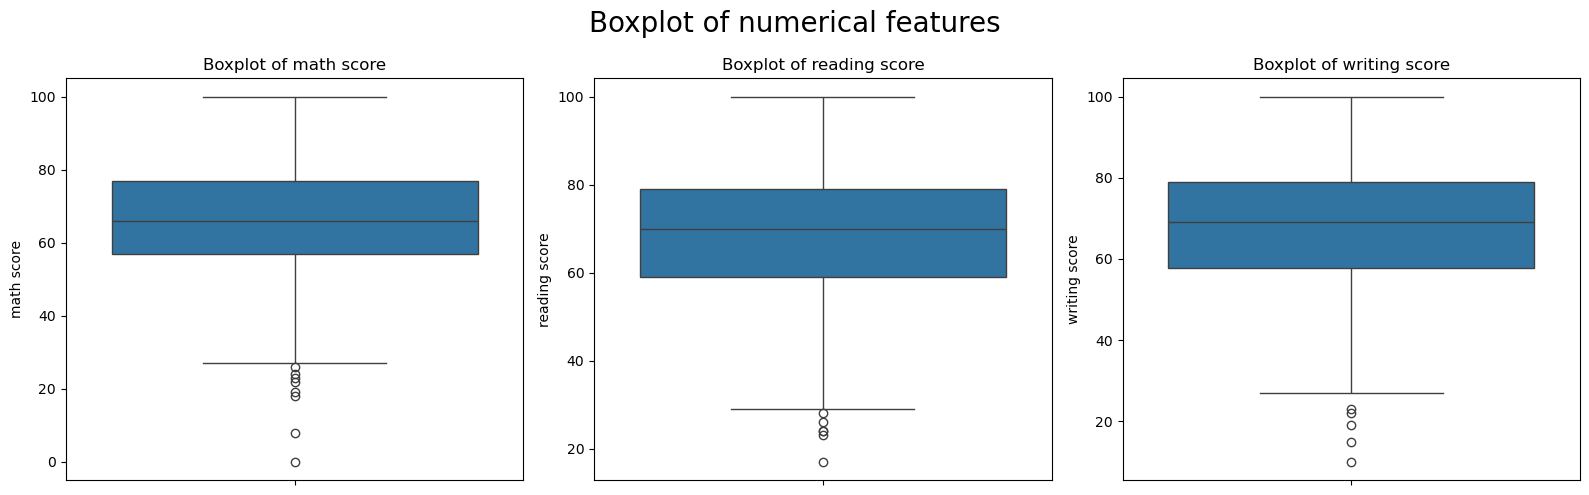

In [657]:
def plot_boxplot(data, features):
    fig , (ax1, ax2, ax3)=plt.subplots(ncols=3, figsize=(16,5))

    ax1= sns.boxplot(data[features[0]], ax=ax1)
    ax1.set_title(f'Boxplot of {features[0]}', size=12)
    ax2= sns.boxplot(data[features[1]], ax=ax2)
    ax3= sns.boxplot(data[features[2]], ax=ax3)
    ax2.set_title(f'Boxplot of {features[1]}', size=12)
    ax3.set_title(f'Boxplot of {features[2]}', size=12)

    plt.suptitle('Boxplot of numerical features', size=20)
    plt.tight_layout()
    plt.show()


plot_boxplot(StudentsPerformance, num_cols)





In [658]:
outliers_precentage= []
print('Outliers percentage in the columns: ')
print()

def outliers_percentage_search(data2, features):
    for i, j in data2[features].items():
        if data2[i].dtype != 'O':
            q1 = j.quantile(0.25)
            q3 = j.quantile(0.75)
            irq= q3 - q1
            j_col= j[(j <= q1 - 1.5*irq) | (j>= q3 + 1.5*irq)]
            perc=(np.shape(j_col)[0] *100.00/ np.shape(data2)[0])
            out_tuple= (i,int(perc)) 
            outliers_precentage.append(out_tuple)
            print("Column %s outliers = %.1f%%" % (i,perc))


outliers_percentage_search(StudentsPerformance, num_cols)

            

Outliers percentage in the columns: 

Column math score outliers = 1.0%
Column reading score outliers = 0.8%
Column writing score outliers = 0.5%


### Encoding of the Categorical Variables



##### Encoding gender, lunch and the test preparation course

In [659]:
data = StudentsPerformance.copy()

list_predictors = data.columns.tolist()
list_predictors.remove('math score')
list_predictors.remove('reading score')
list_predictors.remove('writing score')

lab_enc= LabelEncoder()
lab_enc_cols= ['gender','lunch', 'test preparation course']

X_train, X_test, y_train, y_test =train_test_split(data[list_predictors], data['math score'], test_size=0.2, random_state=42)


for col in lab_enc_cols:
    X_train[col]= lab_enc.fit_transform(X_train[col])
    X_test[col]= lab_enc.transform(X_test[col])

X_test.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
521,0,group C,associate's degree,1,1
737,0,group B,some college,0,0
740,1,group D,bachelor's degree,1,1
660,1,group C,some college,0,1
411,1,group E,some college,1,0


#### Encoding race/ethnicity and parental level of education 

In [660]:
X_train['parental level of education'].unique()

array(["master's degree", "bachelor's degree", 'some college',
       'high school', "associate's degree", 'some high school'],
      dtype=object)

In [661]:
edu_dict= {'some hight school':0, 'hight school':1, 'some college':2, "associate's degree":3, "bachelor's degree":4, "master's degree":5}

X_train['parental level of education']=X_train['parental level of education'].map(edu_dict)
X_test['parental level of education']=X_test['parental level of education'].map(edu_dict)

X_test.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
521,0,group C,3.0,1,1
737,0,group B,2.0,0,0
740,1,group D,4.0,1,1
660,1,group C,2.0,0,1
411,1,group E,2.0,1,0


In [662]:
race_count_map= X_train['race/ethnicity'].value_counts().to_dict()
#print(X_train['race/ethnicity'].value_counts())

X_train['race/ethnicity']=X_train['race/ethnicity'].map(race_count_map)
X_test['race/ethnicity']= X_test['race/ethnicity'].map(race_count_map)

X_train.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
29,0,202,5.0,1,1
535,0,260,4.0,0,0
695,0,202,2.0,0,1
557,1,260,5.0,0,1
836,1,116,NaN,1,1


In [663]:
list_predictors= data.columns.tolist()
list_predictors
list_predictors.remove('math score')
list_predictors.remove('reading score')
list_predictors.remove('writing score')

lab_enc= LabelEncoder()
lab_enc_cols= ['gender', 'lunch', 'test preparation course']

X_train, X_test, y_train, y_test = train_test_split(
    data[list_predictors],  
    data["math score"],    
    test_size=0.2,  
    random_state=42,
) 

for col in lab_enc_cols:
    X_train[col] = lab_enc.fit_transform(X_train[col])
    X_test[col]  = lab_enc.transform(X_test[col])



In [664]:
ordinal_enc = OrdinalEncoder(
    encoding_method="ordered",
    variables=["race/ethnicity", "parental level of education"],
)

ordinal_enc.fit(X_train, y_train)
ordinal_enc.encoder_dict_

{'race/ethnicity': {'group B': 0,
  'group A': 1,
  'group C': 2,
  'group D': 3,
  'group E': 4},
 'parental level of education': {'high school': 0,
  'some high school': 1,
  'some college': 2,
  "master's degree": 3,
  "associate's degree": 4,
  "bachelor's degree": 5}}

In [665]:
X_train= ordinal_enc.transform(X_train)
X_test= ordinal_enc.transform(X_test)

X_train.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
29,0,3,3,1,1
535,0,2,5,0,0
695,0,3,2,0,1
557,1,2,3,0,1
836,1,4,0,1,1


In [666]:
# mean encoding 

list_predictors= data.columns.tolist()
list_predictors.remove('math score')
list_predictors.remove('reading score')
list_predictors.remove('writing score')

lab_enc= LabelEncoder()
lab_enc.cols= ['gender', 'lunch', 'test preparation course']

X_train, X_test, y_train, y_test = train_test_split(data[list_predictors], data['math score'], test_size=0.2, random_state=42)

for col in lab_enc_cols:
    X_train[col]=lab_enc.fit_transform(X_train[col])
    X_test[col]=lab_enc.fit_transform(X_test[col])

X_test.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
521,0,group C,associate's degree,1,1
737,0,group B,some college,0,0
740,1,group D,bachelor's degree,1,1
660,1,group C,some college,0,1
411,1,group E,some college,1,0


In [667]:
mean_enc= MeanEncoder(variables=["race/ethnicity", "parental level of education"])

mean_enc.fit(X_train, y_train)
mean_enc.encoder_dict_

{'race/ethnicity': {'group A': 63.94202898550725,
  'group B': 63.411764705882355,
  'group C': 64.77692307692308,
  'group D': 67.4059405940594,
  'group E': 74.35344827586206},
 'parental level of education': {"associate's degree": 67.95530726256983,
  "bachelor's degree": 70.51041666666667,
  'high school': 62.704402515723274,
  "master's degree": 67.87234042553192,
  'some college': 67.6043956043956,
  'some high school': 64.23357664233576}}

In [668]:
X_train= mean_enc.transform(X_train)
X_test= mean_enc.transform(X_test)

X_train.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
29,0,67.405941,67.872340,1,1
535,0,64.776923,70.510417,0,0
695,0,67.405941,67.604396,0,1
557,1,64.776923,67.872340,0,1
836,1,74.353448,62.704403,1,1


In [669]:
## regresion whith statsmodel

In [670]:
## prediciting the math score 

col_dict={'race/ethnicity': 'race_ethnicity',
          'parental level of education':'parental_education',
          'test preparation course':'test_preparation_course',
          'math score':'math_score',
          'reading score':'reading_score',
          'writing score':'writing_score'
          }

data.rename(columns=col_dict,inplace=True)

data.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [671]:
train, test = train_test_split(data , test_size=0.2, random_state=42)

model1 = sm.OLS.from_formula('math_score ~ C(gender) + C(race_ethnicity) + C(parental_education) + C(lunch) + C(test_preparation_course)', data=train)

results1= model1.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math_score   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     23.84
Date:                Mon, 12 May 2025   Prob (F-statistic):           1.17e-45
Time:                        19:04:25   Log-Likelihood:                -3178.4
No. Observations:                 800   AIC:                             6383.
Df Residuals:                     787   BIC:                             6444.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     59.0919      2.073     28.512      0.000      55.024      63.160
C(gender)[T.male]                              4.5207      0.927      4.879      0.000       2.702       6.340
C(race_ethnicity)[T.group B]                   0.1824      1.897      0.096      0.923      -3.541       3.906
C(race_ethnicity)[T.group C]                   0.6029      1.780      0.339      0.735      -2.891       4.096
C(race_ethnicity)[T.group D]                   3.6121      1.827      1.977      0.048       0.026       7.199
C(race_ethnicity)[T.group E]                   9.0779      1.991      4.559      0.000       5.169      12.987
C(parental_education)[T.bachelor's degree]     3.1191      1.641      1.900      0.058      -0.103       6.341
C(parental_education)[T.high school]          -4.0905      1.423     -2.875      0.004      -6.883      -1.298
C(parental_education)[T.master's degree]       1.0746      2.138      0.503      0.615      -3.122       5.271
C(parental_education)[T.some college]         -0.1450      1.369     -0.106      0.916      -2.832       2.542
C(parental_education)[T.some high school]     -2.8964      1.483     -1.953      0.051      -5.808       0.015
C(lunch)[T.standard]                          11.5240      0.966     11.936      0.000       9.629      13.419
C(test_preparation_course)[T.none]            -5.8745      0.971     -6.048      0.000      -7.781      -3.968
==============================================================================
Omnibus:                        8.866   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                7.443
Skew:                          -0.161   Prob(JB):                       0.0242
Kurtosis:                       2.653   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [672]:
pred_train = results1.predict(train)
print('R^2 (train set):', r2_score(train['math_score'], pred_train))
print('MAE (train set):', mean_absolute_error(train['math_score'], pred_train))

print()

pred_test = results1.predict(test)
print('R^2 (test set):', r2_score(test['math_score'], pred_test))
print('MAE (test set):', mean_absolute_error(test['math_score'], pred_test))

R^2 (train set): 0.26660391608072975
MAE (train set): 10.469718081254205

R^2 (test set): 0.17599998338250755
MAE (test set): 11.269872775277644


In [673]:
#### add comments 

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

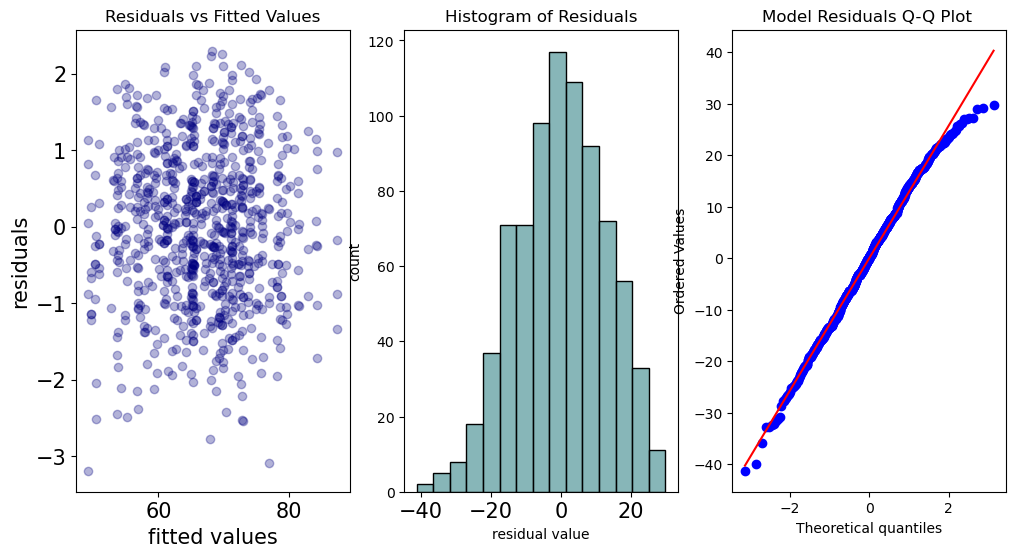

In [681]:
fig , (ax1, ax2, ax3)= plt.subplots(ncols=3, figsize=(12,6))

ax1.plot(results1.fittedvalues, results1.resid_pearson , "o", alpha=0.3, color='navy')
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.set_xlabel("fitted values", fontsize=15)
ax1.set_ylabel("residuals", fontsize=15)
ax1.set_title("Residuals vs Fitted Values")



res= results1.resid
ax2=sns.histplot(res, bins=15, ax=ax2, color='cadetblue')
ax2.xaxis.set_tick_params(labelsize=15)
#ax2.yaxis.set_tick_params(labelsize=15)
ax2.set_xlabel('residual value')
ax2.set_ylabel('count')
ax2.set_title('Histogram of Residuals')


ax3= probplot(results1.resid, dist='norm', plot=plt)
plt.title('Model Residuals Q-Q Plot ')


plt.tight_layout

In [682]:
### predicting the reading score

model2 = sm.OLS.from_formula('reading_score ~ C(gender) + C(race_ethnicity) + C(parental_education) + C(lunch) + C(test_preparation_course)', data=train)

results2 = model2.fit()

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          reading_score   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     20.33
Date:                Mon, 12 May 2025   Prob (F-statistic):           4.59e-39
Time:                        19:09:33   Log-Likelihood:                -3163.9
No. Observations:                 800   AIC:                             6354.
Df Residuals:                     787   BIC:                             6415.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     72.7838      2.035     35.761      0.000      68.789      76.779
C(gender)[T.male]                             -7.4137      0.910     -8.148      0.000      -9.200      -5.628
C(race_ethnicity)[T.group B]                  -0.5303      1.863     -0.285      0.776      -4.187       3.126
C(race_ethnicity)[T.group C]                   0.6742      1.748      0.386      0.700      -2.756       4.105
C(race_ethnicity)[T.group D]                   2.8120      1.794      1.567      0.117      -0.710       6.334
C(race_ethnicity)[T.group E]                   4.4849      1.955      2.294      0.022       0.646       8.323
C(parental_education)[T.bachelor's degree]     3.1007      1.612      1.924      0.055      -0.064       6.265
C(parental_education)[T.high school]          -4.3740      1.397     -3.131      0.002      -7.117      -1.631
C(parental_education)[T.master's degree]       1.9177      2.100      0.913      0.361      -2.204       6.039
C(parental_education)[T.some college]         -1.2428      1.344     -0.925      0.356      -3.881       1.396
C(parental_education)[T.some high school]     -2.7864      1.456     -1.913      0.056      -5.645       0.072
C(lunch)[T.standard]                           7.4655      0.948      7.874      0.000       5.604       9.327
C(test_preparation_course)[T.none]            -7.5712      0.954     -7.937      0.000      -9.444      -5.699
==============================================================================
Omnibus:                       11.506   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                8.903
Skew:                          -0.162   Prob(JB):                       0.0117
Kurtosis:                       2.597   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""